In [10]:
from qiskit import QuantumCircuit ,QuantumRegister , ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram



In the Deutsch–Jozsa algorithm, an oracle is a black-box function that flips an output (ancilla) qubit depending on the input qubits. The oracle_constant0 does nothing, representing a function that always outputs 0—so the output qubit stays off. The oracle_constant1 flips the output qubit once at the start, representing a function that always outputs 1, so the qubit is always on. The oracle_balanced_x0 flips the output qubit only if the first input qubit is 1, meaning it flips for half the inputs and stays the same for the other half, making it a balanced function. Finally, the oracle_balanced_parity flips the output qubit based on the parity of the first three inputs: it flips if an odd number of inputs are 1 and stays the same if even, also making it balanced. Intuitively, the output qubit acts like a switch that either never flips, always flips, flips for certain inputs, or flips depending on the odd/even combination of input qubits.

In [12]:
def oracle_constant0(qc, n):
    # Do nothing
    pass

def oracle_constant1(qc, n):
    qc.x(n)   # flip the output qubit

def oracle_balanced_x0(qc, n):
    qc.cx(0, n)   # control = input 0, target = output

def oracle_balanced_parity(qc, n):
    qc.cx(0, n)
    qc.cx(1, n)
    qc.cx(2, n)


This circuit implements the Deutsch–Jozsa algorithm to test whether a function is constant or balanced.

1. Initialization:

We have 3 input qubits (0,1,2) and 1 ancilla/output qubit (3).

The ancilla qubit is flipped to 
∣
1
⟩
∣1⟩ using qc.x(n) and then put into superposition using a Hadamard (qc.h(n)), preparing it to detect flips by the oracle.

The input qubits are put into superposition using qc.h([0,1,2]), creating all possible input combinations simultaneously.

2. Oracle:

oracle_balanced_parity flips the ancilla qubit based on the parity of the three input qubits.

If an odd number of input qubits are 1, the ancilla flips; if even, it stays the same.

This encodes a balanced function into the circuit.

3. Interference (Hadamard after oracle):

After the oracle, Hadamard gates are applied again to the input qubits (qc.h([0,1,2])).

This step causes quantum interference, such that if the function is balanced, the probability of measuring all 0’s becomes 0; if constant, all 0’s would be measured with certainty.

4. Measurement:

Input qubits are measured into classical bits (qc.measure([0,1,2], [0,1,2])).

The measurement reveals the result:

If all bits are 0, the function is constant.

If any bit is 1, the function is balanced.

5. Simulation:

The circuit is run on a qasm_simulator with 1024 shots.

The resulting counts show the output distribution, and plot_histogram visualizes it.

## Intuition:

Think of the ancilla qubit as a “parity switch” that flips for certain input combinations.

Hadamard gates create superpositions to explore all inputs simultaneously and then interfere them to reveal if the function is constant or balanced.

Measuring the input qubits at the end tells us the answer with just one evaluation of the oracle, demonstrating the quantum speedup.

{'111': 1024}


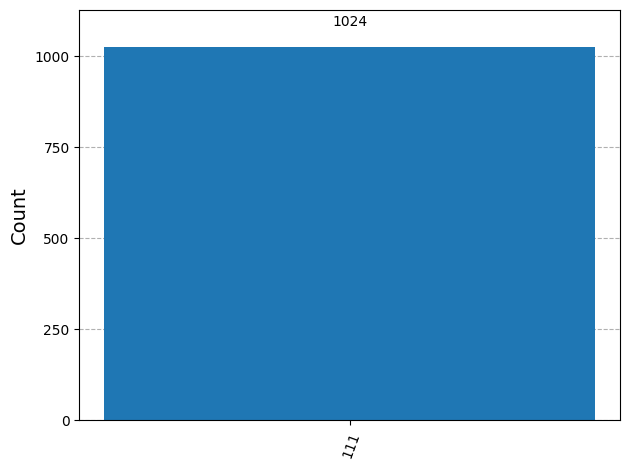

In [13]:

from qiskit.visualization import plot_histogram

n = 3
qc = QuantumCircuit(n+1, n)  # 4 qubits, 3 classical bits
qc.x(n)                     # prepare ancilla
qc.h(list(range(n)))        # Hadamard on input qubits
qc.h(n)                     # Hadamard on ancilla
qc.barrier()

oracle_balanced_parity(qc, n)
qc.barrier()

qc.h(list(range(n)))        # Hadamard on input qubits after oracle
qc.measure([0,1,2], [0,1,2])

backend = Aer.get_backend("qasm_simulator")
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


The histogram shows that the 3 input qubits are always measured as 111. This is because the parity oracle is a balanced function: the ancilla flips for odd parity inputs, and the final Hadamard gates create constructive interference only for the 111 state. No other input states are observed, demonstrating the Deutsch–Jozsa algorithm’s ability to distinguish balanced functions.